In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [48]:
bos = datasets.load_boston()

In [49]:
bos

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [50]:
x = pd.DataFrame(bos['data'])

In [51]:
x.columns = bos['feature_names']

### This is a dataframe

In [52]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### This is an array

In [53]:
y = bos['target']

In [54]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Scale Data
Neural Networks are especially sensitive to data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1).

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12],scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_train_df = pd.DataFrame(scaled_train, columns = x.columns.values)


Note: median values were scaled by multiplying by 0.0275938190 and adding -0.047737


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

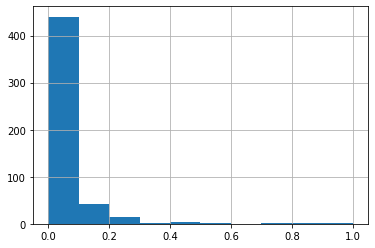

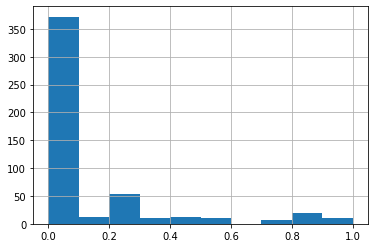

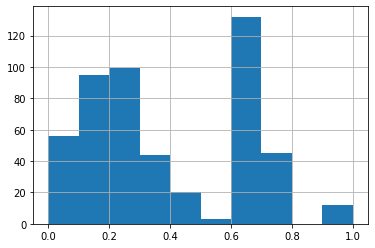

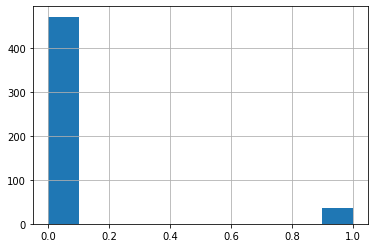

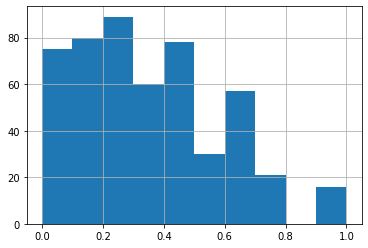

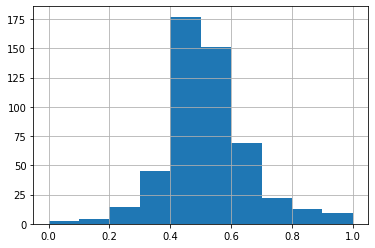

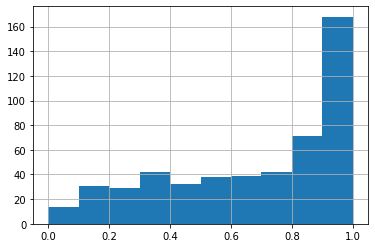

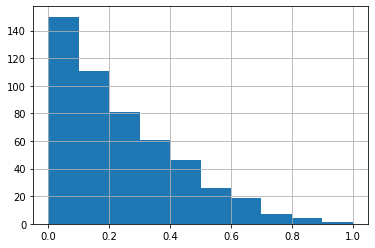

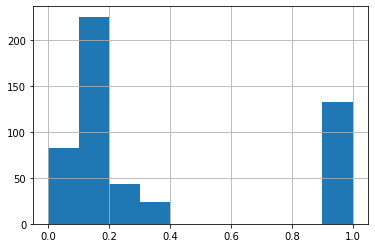

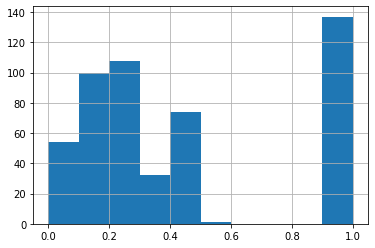

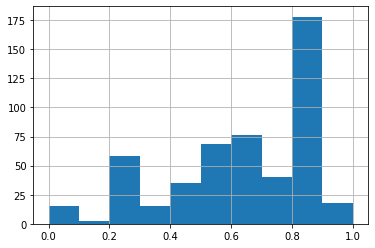

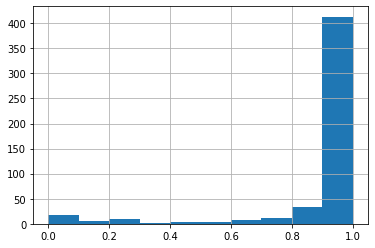

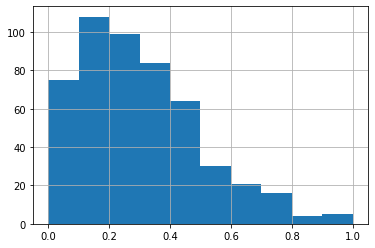

In [60]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model
Alright, lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in TensorFlow.  They are closely related, but this IS TensorFlow (package), not Keras (package).

https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [45]:
model = tf.keras.Sequential()

model.add(layers.Dense(10, activation = 'sigmoid'))
model.add(layers.Dense(1))

## Compile Model
The compile step adds an optimizer (solver) and your loss metrics.

In [46]:
model.compile(optimizer='sgd',
             loss = 'mean_squared_error',
             metrics = ['mean_squared_error'])

## Fit Model
Now it is time to train.

In [61]:
model.fit(scaled_train_df.values, y, epochs=10, batch_size=32)

Train on 506 samples
Epoch 1/10
506/506 [==============================] - 0s 472us/sample - loss: 257.3044 - mean_squared_error: 257.3044
Epoch 2/10
506/506 [==============================] - 0s 42us/sample - loss: 82.8855 - mean_squared_error: 82.8855
Epoch 3/10
506/506 [==============================] - 0s 44us/sample - loss: 74.5082 - mean_squared_error: 74.5082
Epoch 4/10
506/506 [==============================] - 0s 44us/sample - loss: 66.7851 - mean_squared_error: 66.7851
Epoch 5/10
506/506 [==============================] - 0s 48us/sample - loss: 60.7897 - mean_squared_error: 60.7897
Epoch 6/10
506/506 [==============================] - 0s 42us/sample - loss: 56.0027 - mean_squared_error: 56.0027
Epoch 7/10
506/506 [==============================] - 0s 47us/sample - loss: 52.3155 - mean_squared_error: 52.3155
Epoch 8/10
506/506 [==============================] - 0s 48us/sample - loss: 48.7813 - mean_squared_error: 48.7813
Epoch 9/10
506/506 [==============================] - 0s

## Visualize the data
TensorBoard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch.  TensorBoard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

In [63]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell TensorBoard where your logs are being stored**

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir /Users/bblanop/SMU/QTW/logs

In [64]:
model.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [65]:
model.fit(scaled_train_df.values, y, epochs=100, batch_size=20, callbacks=[tb])

Train on 506 samples
Epoch 1/100
506/506 [==============================] - 0s 497us/sample - loss: 42.2873 - mean_squared_error: 42.2873
Epoch 2/100
506/506 [==============================] - 0s 66us/sample - loss: 41.8867 - mean_squared_error: 41.8867
Epoch 3/100
506/506 [==============================] - 0s 73us/sample - loss: 41.4994 - mean_squared_error: 41.4994
Epoch 4/100
506/506 [==============================] - 0s 66us/sample - loss: 41.1894 - mean_squared_error: 41.1894
Epoch 5/100
506/506 [==============================] - 0s 61us/sample - loss: 40.8574 - mean_squared_error: 40.8574
Epoch 6/100
506/506 [==============================] - 0s 65us/sample - loss: 40.5303 - mean_squared_error: 40.5303
Epoch 7/100
506/506 [==============================] - 0s 61us/sample - loss: 40.2342 - mean_squared_error: 40.2342
Epoch 8/100
506/506 [==============================] - 0s 59us/sample - loss: 39.9019 - mean_squared_error: 39.9019
Epoch 9/100
506/506 [=============================

506/506 [==============================] - 0s 64us/sample - loss: 26.5744 - mean_squared_error: 26.5744
Epoch 71/100
506/506 [==============================] - 0s 62us/sample - loss: 26.4696 - mean_squared_error: 26.4696
Epoch 72/100
506/506 [==============================] - 0s 57us/sample - loss: 26.3596 - mean_squared_error: 26.3597
Epoch 73/100
506/506 [==============================] - 0s 63us/sample - loss: 26.1968 - mean_squared_error: 26.1968
Epoch 74/100
506/506 [==============================] - 0s 62us/sample - loss: 26.1032 - mean_squared_error: 26.1032
Epoch 75/100
506/506 [==============================] - 0s 63us/sample - loss: 25.9517 - mean_squared_error: 25.9517
Epoch 76/100
506/506 [==============================] - 0s 61us/sample - loss: 25.8241 - mean_squared_error: 25.8241
Epoch 77/100
506/506 [==============================] - 0s 66us/sample - loss: 25.7309 - mean_squared_error: 25.7309
Epoch 78/100
506/506 [==============================] - 0s 67us/sample - loss

## Validate!
SO far we have used the entire dataset to train.  We know that this is not acceptable.  In Neural Networks, rather than a cross validation, a validation split is done.  Lets repeat the experiment with splits.

In [66]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
#tb = TensorBoard(log_dir=f"logs\\{time()}")
tb = TensorBoard(log_dir=f"logs")

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=101)

In [68]:
model_final = tf.keras.Sequential()

model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(100, activation='sigmoid'))
model_final.add(layers.Dense(1))

In [69]:
model_final.compile(optimizer=tf.optimizers.SGD(0.001),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [70]:
model_final.fit(x_train.values, y_train, validation_data=(x_test.values,y_test), epochs=100, batch_size=20, callbacks=[tb])


Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 1ms/sample - loss: 271.1727 - mean_squared_error: 271.1727 - val_loss: 140.6722 - val_mean_squared_error: 140.6722
Epoch 2/100
404/404 [==============================] - 0s 107us/sample - loss: 82.8569 - mean_squared_error: 82.8569 - val_loss: 113.5467 - val_mean_squared_error: 113.5467
Epoch 3/100
404/404 [==============================] - 0s 125us/sample - loss: 76.9996 - mean_squared_error: 76.9996 - val_loss: 111.9876 - val_mean_squared_error: 111.9876
Epoch 4/100
404/404 [==============================] - 0s 122us/sample - loss: 77.4081 - mean_squared_error: 77.4081 - val_loss: 113.7988 - val_mean_squared_error: 113.7988
Epoch 5/100
404/404 [==============================] - 0s 116us/sample - loss: 77.0823 - mean_squared_error: 77.0823 - val_loss: 111.8420 - val_mean_squared_error: 111.8420
Epoch 6/100
404/404 [==============================] - 0s 119us/sample - loss: 76.9305 - 

Epoch 48/100
404/404 [==============================] - 0s 120us/sample - loss: 63.9428 - mean_squared_error: 63.9428 - val_loss: 95.2285 - val_mean_squared_error: 95.2285
Epoch 49/100
404/404 [==============================] - 0s 123us/sample - loss: 63.1691 - mean_squared_error: 63.1691 - val_loss: 93.1726 - val_mean_squared_error: 93.1726
Epoch 50/100
404/404 [==============================] - 0s 122us/sample - loss: 62.4041 - mean_squared_error: 62.4041 - val_loss: 91.5706 - val_mean_squared_error: 91.5706
Epoch 51/100
404/404 [==============================] - 0s 118us/sample - loss: 61.6637 - mean_squared_error: 61.6637 - val_loss: 89.6418 - val_mean_squared_error: 89.6418
Epoch 52/100
404/404 [==============================] - 0s 113us/sample - loss: 61.1156 - mean_squared_error: 61.1156 - val_loss: 91.2868 - val_mean_squared_error: 91.2867
Epoch 53/100
404/404 [==============================] - 0s 110us/sample - loss: 60.5351 - mean_squared_error: 60.5351 - val_loss: 89.2610 - 

404/404 [==============================] - 0s 98us/sample - loss: 39.5659 - mean_squared_error: 39.5659 - val_loss: 58.7244 - val_mean_squared_error: 58.7244
Epoch 96/100
404/404 [==============================] - 0s 102us/sample - loss: 39.2143 - mean_squared_error: 39.2143 - val_loss: 55.2323 - val_mean_squared_error: 55.2323
Epoch 97/100
404/404 [==============================] - 0s 105us/sample - loss: 38.6923 - mean_squared_error: 38.6923 - val_loss: 55.0458 - val_mean_squared_error: 55.0458
Epoch 98/100
404/404 [==============================] - 0s 99us/sample - loss: 38.5532 - mean_squared_error: 38.5532 - val_loss: 56.0452 - val_mean_squared_error: 56.0452
Epoch 99/100
404/404 [==============================] - 0s 94us/sample - loss: 38.2413 - mean_squared_error: 38.2413 - val_loss: 54.1741 - val_mean_squared_error: 54.1741
Epoch 100/100
404/404 [==============================] - 0s 94us/sample - loss: 37.7598 - mean_squared_error: 37.7598 - val_loss: 53.0245 - val_mean_squared

## Classification?
The only thing we really need to change is the final layer to predict classes.

In [80]:
model_iris = tf.keras.Sequential()

model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(100, activation = 'sigmoid'))
model_iris.add(layers.Dense(3, activation = 'sigmoid'))

model_iris.compile(optimizer=tf.optimizers.SGD(0.01),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

log_dir = 'iris_logs'
tb_iris = TensorBoard(log_dir=log_dir, histogram_freq=1)

**In your terminal, you'll need to tell tensorboard where your logs are being stored**

Ex. CUS_C02VJ0NQHTDF:~ bblanchard006$ tensorboard --logdir /Users/bblanop/SMU/QTW/iris_logs

In [81]:
iris = datasets.load_iris()

In [82]:
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=102)

In [83]:
model_iris.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=4, callbacks=[tb_iris])


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/sample - loss: 1.1081 - accuracy: 0.3500 - val_loss: 1.1204 - val_accuracy: 0.2667
Epoch 2/100
120/120 [==============================] - 0s 432us/sample - loss: 1.0981 - accuracy: 0.3500 - val_loss: 1.1091 - val_accuracy: 0.2667
Epoch 3/100
120/120 [==============================] - 0s 511us/sample - loss: 1.0936 - accuracy: 0.3500 - val_loss: 1.1031 - val_accuracy: 0.2667
Epoch 4/100
120/120 [==============================] - 0s 429us/sample - loss: 1.0919 - accuracy: 0.3500 - val_loss: 1.0995 - val_accuracy: 0.2667
Epoch 5/100
120/120 [==============================] - 0s 479us/sample - loss: 1.0911 - accuracy: 0.3500 - val_loss: 1.0967 - val_accuracy: 0.2667
Epoch 6/100
120/120 [==============================] - 0s 491us/sample - loss: 1.0891 - accuracy: 0.3500 - val_loss: 1.0947 - val_accuracy: 0.2667
Epoch 7/100
120/120 [==============================] - 0s 480us/sample - lo

120/120 [==============================] - 0s 441us/sample - loss: 0.7425 - accuracy: 0.7917 - val_loss: 0.7170 - val_accuracy: 0.7667
Epoch 57/100
120/120 [==============================] - 0s 416us/sample - loss: 0.7311 - accuracy: 0.8167 - val_loss: 0.6802 - val_accuracy: 0.7667
Epoch 58/100
120/120 [==============================] - 0s 436us/sample - loss: 0.7217 - accuracy: 0.7917 - val_loss: 0.6671 - val_accuracy: 0.8000
Epoch 59/100
120/120 [==============================] - 0s 399us/sample - loss: 0.7097 - accuracy: 0.7500 - val_loss: 0.6669 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 435us/sample - loss: 0.6872 - accuracy: 0.7917 - val_loss: 0.6728 - val_accuracy: 0.7000
Epoch 61/100
120/120 [==============================] - 0s 396us/sample - loss: 0.6822 - accuracy: 0.7833 - val_loss: 0.6564 - val_accuracy: 0.7667
Epoch 62/100
120/120 [==============================] - 0s 392us/sample - loss: 0.6652 - accuracy: 0.8167 - val_loss: 0.6254 

In [84]:
predictions = model_iris.predict(x_test)

In [85]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))

Prediction: [0 2 1 1 2 0 0 0 1 1 2 2 0 2 2 0 0 2 0 2 0 2 1 2 0 1 2 2 2 0]
   Actuals: [0 2 1 1 2 0 0 0 1 1 2 1 0 2 2 0 0 2 0 2 0 2 1 1 0 1 2 2 2 0]


In [86]:
predictions

array([[0.15314516, 0.01627585, 0.00108805],
       [0.00097525, 0.03818163, 0.07283363],
       [0.0040122 , 0.03018385, 0.02342936],
       [0.00534704, 0.02905965, 0.01846334],
       [0.00062716, 0.04024807, 0.10333285],
       [0.17052984, 0.01592308, 0.00098488],
       [0.16635713, 0.0158059 , 0.00100204],
       [0.22086188, 0.01484245, 0.00076216],
       [0.01269189, 0.02520469, 0.00911462],
       [0.00279322, 0.03201956, 0.03139827],
       [0.00129235, 0.0367386 , 0.05881077],
       [0.00237843, 0.03294003, 0.03582954],
       [0.15029186, 0.0162147 , 0.00110474],
       [0.00187385, 0.03401765, 0.04306284],
       [0.00054428, 0.04208907, 0.11663678],
       [0.18466899, 0.01524317, 0.0009076 ],
       [0.19844016, 0.0153338 , 0.00084832],
       [0.00080049, 0.03933126, 0.08604175],
       [0.22144857, 0.01484549, 0.00076023],
       [0.00120327, 0.03689328, 0.06156933],
       [0.1957173 , 0.01511848, 0.00085807],
       [0.00130418, 0.03614706, 0.05803147],
       [0.

In [87]:
test_accuracy = tf.keras.metrics.Accuracy()


In [88]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 93.333%


In [41]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 91060), started 0:02:50 ago. (Use '!kill 91060' to kill it.)

## Case Study 12

In [31]:
df = pd.read_csv('HIGGS.csv', header=None)

In [32]:
# Verify size is as expected
print("{:>25}{:>10,} x {:,}\n".format("Shape of raw data is ", df.shape[0], df.shape[1]))

    Shape of raw data is 11,000,000 x 29



In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [34]:
df[0].describe()

count    1.100000e+07
mean     5.299203e-01
std      4.991040e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: 0, dtype: float64